# Descriptive Statistics

This material is an adaptation of the course [Quantitative Neuroscience](http://www.compneurosci.com/NSCI801.html) developed by Gunnar Blohm and Joe Nashed at the [University of Queens](https://www.queensu.ca/). 

It also includes fragments from the tutorials [Python Statistics Fundamentals: How to Describe Your Data](https://realpython.com/python-statistics/#summary-of-descriptive-statistics) and [NumPy, SciPy, and Pandas: Correlation With Python](https://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlation)
developed by Mirko Stojiljković in the portal Real Python.

## Descriptive statistics

All descriptive statistics are measures of central tendency or measures of variability, also known as measures of dispersion.

Measures of central tendency focus on the averages or mean values ​​of data sets; while variability measures focus on the dispersion of the data.

These two measures use graphs, tables, and general discussions to help people understand the meaning of the data analyzed.

### Overall summary of statistical measures

Pandas provides useful routines for quickly obtaining descriptive statistics with a single function or method call.

You can use `describe()` like this:

In [1]:
import pandas as pd

sw = pd.read_csv(
    "https://raw.githubusercontent.com/gastonstat/matrix4sl/master/data/starwars.csv"
)
sw.head()

name  gender  height  weight eyecolor haircolor skincolor  \
0  Anakin Skywalker    male    1.88    84.0     blue     blond      fair   
1     Padme Amidala  female    1.65    45.0    brown     brown     light   
2    Luke Skywalker    male    1.72    77.0     blue     blond      fair   
3       Leia Organa  female    1.50    49.0    brown     brown     light   
4      Qui-Gon Jinn    male    1.93    88.5     blue     brown     light   

     homeland     born      died      jedi species      weapon  
0    Tatooine  41.9BBY      4ABY  yes_jedi   human  lightsaber  
1       Naboo    46BBY     19BBY   no_jedi   human     unarmed  
2    Tatooine    19BBY  unk_died  yes_jedi   human  lightsaber  
3    Alderaan    19BBY  unk_died   no_jedi   human     blaster  
4  unk_planet    92BBY     32BBY  yes_jedi   human  lightsaber

In [2]:
sw.describe()

height      weight
count  20.000000   19.000000
mean    1.789000   74.868421
std     0.632405   30.112678
min     0.660000   17.000000
25%     1.665000   62.500000
50%     1.790000   78.000000
75%     1.892500   82.000000
max     3.900000  159.000000

This method returns a new DataFrame containing the following:

- count: the number of elements in your data set
- mean: the mean of your data set
- std: the standard deviation of your data set
- min and max: the minimum and maximum values ​​of your data set
- 25%, 50% and 75%: the quartiles of your data set

If you want the resulting Series object to contain other percentiles, you must specify the percentile value of the optional parameters.

You can calculate each result separately by calling the specific methods:

In [3]:
sw.count()

name         20
gender       20
height       20
weight       19
eyecolor     18
haircolor    18
skincolor    17
homeland     20
born         20
died         20
jedi         20
species      20
weapon       20
dtype: int64

In [4]:
sw.value_counts(subset=["gender"], normalize=True)

gender
male      0.9
female    0.1
Name: proportion, dtype: float64

In [7]:
sw.mean(numeric_only=True)

height     1.789000
weight    74.868421
dtype: float64

In [8]:
sw.std(numeric_only=True)

height     0.632405
weight    30.112678
dtype: float64

In [9]:
sw.min(numeric_only=True)

height     0.66
weight    17.00
dtype: float64

In [10]:
sw.max(numeric_only=True)

height      3.9
weight    159.0
dtype: float64

In [11]:
sw.quantile(0.25, numeric_only=True)

height     1.665
weight    62.500
Name: 0.25, dtype: float64

In [12]:
sw.quantile(0.75, numeric_only=True)

height     1.8925
weight    82.0000
Name: 0.75, dtype: float64

### Shape of distribution

Skewness is a parameter to measure the symmetry of a data set and kurtosis is a parameter to measure how heavy its tails are compared to a normal distribution.

For example:

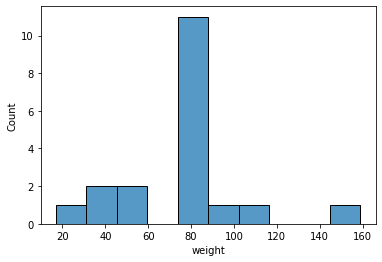

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x="weight", data=sw)
plt.show()

In [14]:
print("skew:", sw["weight"].skew())
print("kurtosis:", sw["weight"].kurtosis())

skew: 0.7274902112518916
kurtosis: 2.871429772733397


In [15]:
sw.skew(numeric_only=True)

height    1.631045
weight    0.727490
dtype: float64

In [16]:
sw.kurtosis(numeric_only=True)

height    6.590584
weight    2.871430
dtype: float64

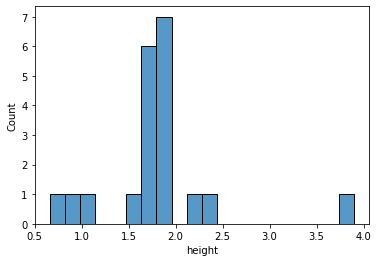

In [17]:
sns.histplot(x="height", data=sw)
plt.show()

In [18]:
print("skew:", sw["height"].skew())
print("kurtosis:", sw["height"].kurtosis())

skew: 1.6310448597414178
kurtosis: 6.5905839871644964


We can also put together an integrated report:

In [20]:
skew = sw.skew(numeric_only=True)
skew.name = "skew"

kurt = sw.kurtosis(numeric_only=True)
kurt.name = "kurtosis"

iqr = sw.quantile(0.75, numeric_only=True) - sw.quantile(
    0.25, numeric_only=True
)
iqr.name = "IQR"

var = sw.std(numeric_only=True) ** 2
var.name = "var"

extra = pd.DataFrame([var, iqr, skew, kurt])

pd.concat([sw.describe(), extra])

height      weight
count     20.000000   19.000000
mean       1.789000   74.868421
std        0.632405   30.112678
min        0.660000   17.000000
25%        1.665000   62.500000
50%        1.790000   78.000000
75%        1.892500   82.000000
max        3.900000  159.000000
var        0.399936  906.773392
IQR        0.227500   19.500000
skew       1.631045    0.727490
kurtosis   6.590584    2.871430

## Correlation analysis

Correlation is closely related to other statistical quantities such as mean, standard deviation, variance, and covariance.

There are several statistics you can use to quantify the correlation. In this section, you will learn about three correlation coefficients:

-Pearson's R
- Spearman's Rho
- Kendall Tau

The Pearson coefficient measures linear correlation, while the Spearman and Kendall coefficients compare data rankings. There are Pandas methods you can use to calculate these coefficients. You can also use Seaborn to conveniently illustrate the results.

In Pandas you can call the `.corr()` method present on objects of type Series or DataFrame.

>**Note:** When working with DataFrame instances, you must keep in mind that rows are observations and columns are features or variables.

In [21]:
corr_matrix = sw.corr(numeric_only=True)
corr_matrix

height    weight
height  1.000000  0.853301
weight  0.853301  1.000000

The resulting correlation matrix is ​​a new DataFrame instance and contains the correlation coefficients for the `sw['height']` and `sw['weight']` columns. These tagged results are usually very convenient to work with because you can access them with their tags or their position indexes:

In [22]:
print(corr_matrix.at["height", "weight"])
print(corr_matrix.iat[0, 1])

0.8533009433159517
0.8533009433159517


This example shows two ways to access the values:

- Use `.at[]` to access a single value by its row and column labels.
- Use `.iat[]` to access a value by its row and column positions.

Or simply:

In [23]:
print(corr_matrix["height"])

height    1.000000
weight    0.853301
Name: height, dtype: float64


In [24]:
print(corr_matrix["weight"])

height    0.853301
weight    1.000000
Name: weight, dtype: float64


You can use `.corr()` to calculate the three correlation coefficients:

- 'pearson'
- 'spearman'
- 'Kendall'

In [25]:
pearson_corr_matrix = sw.corr(method="pearson", numeric_only=True)
pearson_corr_matrix

height    weight
height  1.000000  0.853301
weight  0.853301  1.000000

In [26]:
spearman_corr_matrix = sw.corr(method="spearman", numeric_only=True)
spearman_corr_matrix

height    weight
height  1.000000  0.936236
weight  0.936236  1.000000

In [27]:
kendall_corr_matrix = sw.corr(method="kendall", numeric_only=True)
kendall_corr_matrix

height    weight
height  1.000000  0.815491
weight  0.815491  1.000000

You can apply `.corr()` in the same way with DataFrame objects that contain three or more columns:

In [28]:
davis_data = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Davis.txt",
    sep=r"\s{1,}",
    engine="python",
)
davis_data.head()

sex  weight  height  reportedWeight  reportedHeight
1   M      77     182            77.0           180.0
2   F      58     161            51.0           159.0
3   F      53     161            54.0           158.0
4   M      68     177            70.0           175.0
5   F      59     157            59.0           155.0

In [29]:
davis_data.corr(numeric_only=True)

weight    height  reportedWeight  reportedHeight
weight          1.000000  0.189650        0.835841        0.636326
height          0.189650  1.000000        0.603269        0.744637
reportedWeight  0.835841  0.603269        1.000000        0.761860
reportedHeight  0.636326  0.744637        0.761860        1.000000

### Correlation Matrix Heatmaps

The correlation matrix can get really big and confusing when you have a lot of features! Fortunately, you can present it visually as a heat map where each field has the color that corresponds to its value.

To do this, we will rely on the `heatmap` function present in the seaborn package:

<Axes: >

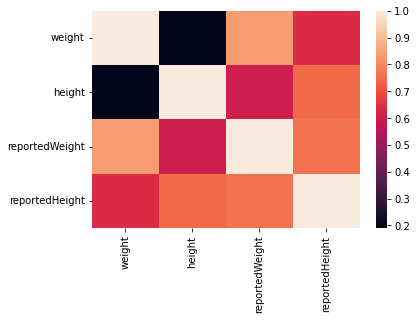

In [30]:
import seaborn as sns

sns.heatmap(davis_data.corr(numeric_only=True))